# Practical Work 3 Part 2 SGD for Multivariable LR

### Import numpy, matplotlib.pyplot

In [1]:
import numpy as np, matplotlib.pyplot as plt ,pandas as pd , seaborn as sns 

### Read your multivariable LR data into X, y variables and make shure of dimensions.

In [2]:
data=np.genfromtxt("MultiVarLR.csv",delimiter=',')
data

array([[ 73.,  80.,  75., 152.],
       [ 93.,  88.,  93., 185.],
       [ 89.,  91.,  90., 180.],
       [ 96.,  98., 100., 196.],
       [ 73.,  66.,  70., 142.],
       [ 53.,  46.,  55., 101.],
       [ 69.,  74.,  77., 149.],
       [ 47.,  56.,  60., 115.],
       [ 87.,  79.,  90., 175.],
       [ 79.,  70.,  88., 164.],
       [ 69.,  70.,  73., 141.],
       [ 70.,  65.,  74., 141.],
       [ 93.,  95.,  91., 184.],
       [ 79.,  80.,  73., 152.],
       [ 70.,  73.,  78., 148.],
       [ 93.,  89.,  96., 192.],
       [ 78.,  75.,  68., 147.],
       [ 81.,  90.,  93., 183.],
       [ 88.,  92.,  86., 177.],
       [ 78.,  83.,  77., 159.],
       [ 82.,  86.,  90., 177.],
       [ 86.,  82.,  89., 175.],
       [ 78.,  83.,  85., 175.],
       [ 76.,  83.,  71., 149.],
       [ 96.,  93.,  95., 192.]])

In [3]:
x=data[:,:3]
y=data[:,3].reshape(-1,1)
print(x.shape)
print(x,y)

(25, 3)
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


### Step 1: Shuffle your data
- In this step we will also get the number of data points <b>(m)</b> and dimensions <b>n+1</b> .
- We will also add the column of ones <b>x0</b>
- Set random seed to 101.

In [4]:
m=len(x)
x_1=np.ones((m,1))
x=np.concatenate(   (x_1,x),axis=1  )
x

array([[  1.,  73.,  80.,  75.],
       [  1.,  93.,  88.,  93.],
       [  1.,  89.,  91.,  90.],
       [  1.,  96.,  98., 100.],
       [  1.,  73.,  66.,  70.],
       [  1.,  53.,  46.,  55.],
       [  1.,  69.,  74.,  77.],
       [  1.,  47.,  56.,  60.],
       [  1.,  87.,  79.,  90.],
       [  1.,  79.,  70.,  88.],
       [  1.,  69.,  70.,  73.],
       [  1.,  70.,  65.,  74.],
       [  1.,  93.,  95.,  91.],
       [  1.,  79.,  80.,  73.],
       [  1.,  70.,  73.,  78.],
       [  1.,  93.,  89.,  96.],
       [  1.,  78.,  75.,  68.],
       [  1.,  81.,  90.,  93.],
       [  1.,  88.,  92.,  86.],
       [  1.,  78.,  83.,  77.],
       [  1.,  82.,  86.,  90.],
       [  1.,  86.,  82.,  89.],
       [  1.,  78.,  83.,  85.],
       [  1.,  76.,  83.,  71.],
       [  1.,  96.,  93.,  95.]])

In [5]:
np.random.seed(101)
data=np.concatenate(   (x,y),axis=1  )
np.random.shuffle(data)
data

array([[  1.,  78.,  75.,  68., 147.],
       [  1.,  69.,  70.,  73., 141.],
       [  1.,  78.,  83.,  85., 175.],
       [  1.,  78.,  83.,  77., 159.],
       [  1.,  47.,  56.,  60., 115.],
       [  1.,  86.,  82.,  89., 175.],
       [  1.,  89.,  91.,  90., 180.],
       [  1.,  96.,  98., 100., 196.],
       [  1.,  93.,  88.,  93., 185.],
       [  1.,  70.,  73.,  78., 148.],
       [  1.,  88.,  92.,  86., 177.],
       [  1.,  73.,  80.,  75., 152.],
       [  1.,  93.,  95.,  91., 184.],
       [  1.,  53.,  46.,  55., 101.],
       [  1.,  76.,  83.,  71., 149.],
       [  1.,  82.,  86.,  90., 177.],
       [  1.,  73.,  66.,  70., 142.],
       [  1.,  87.,  79.,  90., 175.],
       [  1.,  79.,  80.,  73., 152.],
       [  1.,  79.,  70.,  88., 164.],
       [  1.,  93.,  89.,  96., 192.],
       [  1.,  96.,  93.,  95., 192.],
       [  1.,  69.,  74.,  77., 149.],
       [  1.,  81.,  90.,  93., 183.],
       [  1.,  70.,  65.,  74., 141.]])

In [6]:
x_sh=data[:,0:4]
y_sh=data[:,4]
print(x_sh,y_sh)

[[  1.  78.  75.  68.]
 [  1.  69.  70.  73.]
 [  1.  78.  83.  85.]
 [  1.  78.  83.  77.]
 [  1.  47.  56.  60.]
 [  1.  86.  82.  89.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  93.  88.  93.]
 [  1.  70.  73.  78.]
 [  1.  88.  92.  86.]
 [  1.  73.  80.  75.]
 [  1.  93.  95.  91.]
 [  1.  53.  46.  55.]
 [  1.  76.  83.  71.]
 [  1.  82.  86.  90.]
 [  1.  73.  66.  70.]
 [  1.  87.  79.  90.]
 [  1.  79.  80.  73.]
 [  1.  79.  70.  88.]
 [  1.  93.  89.  96.]
 [  1.  96.  93.  95.]
 [  1.  69.  74.  77.]
 [  1.  81.  90.  93.]
 [  1.  70.  65.  74.]] [147. 141. 175. 159. 115. 175. 180. 196. 185. 148. 177. 152. 184. 101.
 149. 177. 142. 175. 152. 164. 192. 192. 149. 183. 141.]


### Step 2: Parameters initialization (thetas = array of zeros, alpha = 0.00001)
- We will also define empty lists to save losses, thetas in all iterations.

In [7]:
ths=[0,0,0,0]
alpha=.00001
loss=[]
th0_arr=[]
th1_arr=[]

### Step 3: Claculate the prediction for the first data point

In [8]:
h=ths@x_sh[0]     # (4) *4
h

0.0

### Step 4: Claculate the error for the first data point prediction h(0) - y(0)

In [9]:
e=h-y_sh[0]
e

-147.0

### Step 5: Claculate the cost for the first data point prediction $\mathbf{\frac{e^2}{2}}$

In [10]:
j=e*e/2
j

10804.5

### Step 6: Claculate the gradient vector for the first data point 
#### grad = e * X[0]

In [11]:
grad=e*x_sh[0]
grad

array([  -147., -11466., -11025.,  -9996.])

### Step 7: Update theta values

In [12]:
ths=ths-alpha*grad
ths

array([0.00147, 0.11466, 0.11025, 0.09996])

### Step 8: Iterate through all data points to finish the first epoch
#### Save thetas and loss each iteration i.e. with each update.
#### Reinitialize parameters in the begining: thetas = array of zeros.
#### Plot the learning curves to explore parameters update in single epoch.

In [13]:
n_1=x.shape[1]
ths=np.zeros(n_1)
loss=[]
ths_arr=[]
alpha=.00001
m=x.shape[0]
for i in range(m):
    ths_arr.append(ths)
    h=ths@x_sh[i]       # (4,) ,(4,)
    e=h-y_sh[i]           #scalar
    j=e*e/2         #scaler
    loss.append(j)
    grad=e*x_sh[i]    # vec of 4 elem 
    np.linalg.norm(grad) 
    ths=ths-alpha*grad
    
    



In [14]:
ths_arr=np.array(ths_arr)
ths_arr.shape   # لاحظ  ان مش محتاج اعمل  رى شيب  عشان دى  dimantion less

(25, 4)

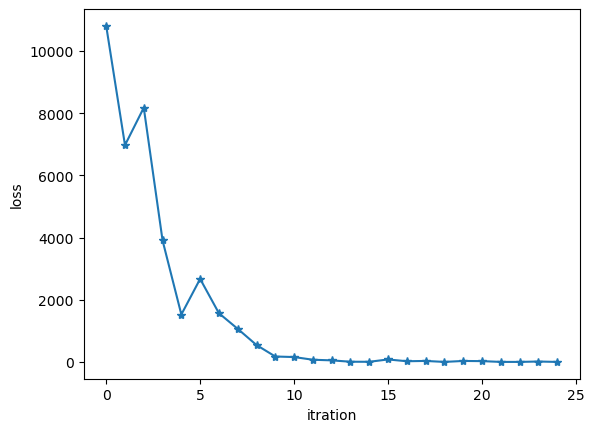

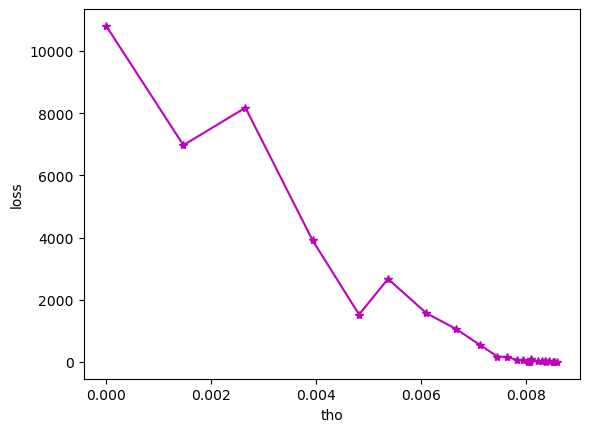

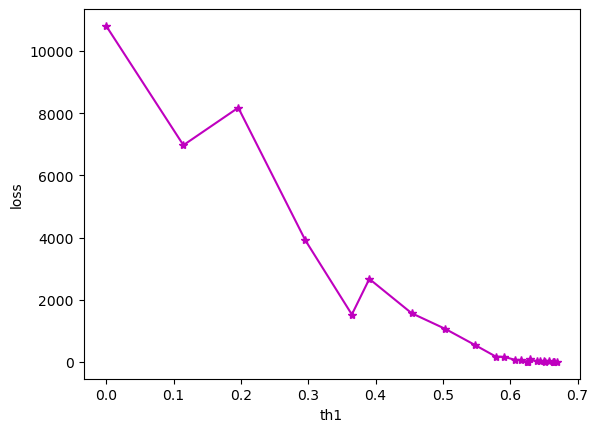

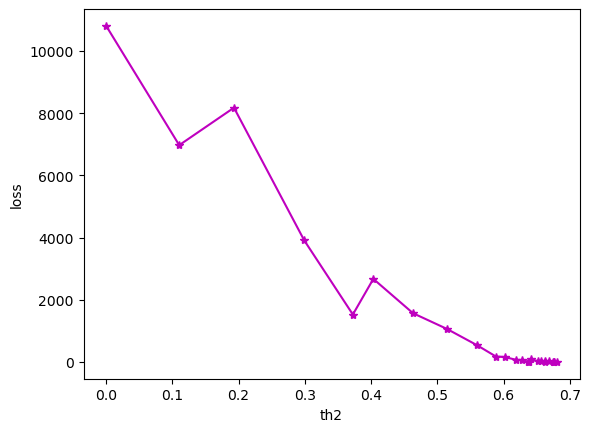

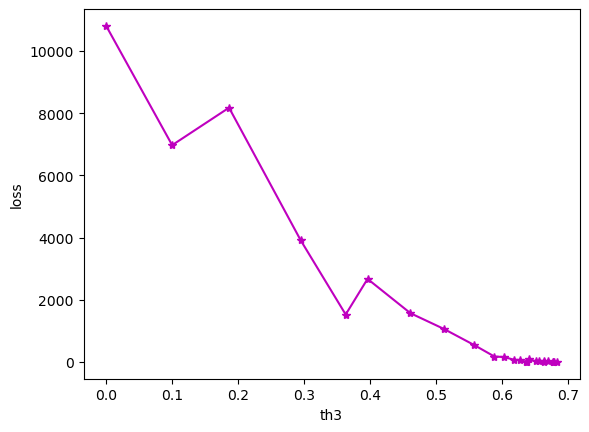

In [15]:

plt.figure()

plt.plot(loss,"*-")
plt.xlabel("itration")
plt.ylabel("loss")

plt.show()


plt.figure()

plt.plot(ths_arr[:,0],loss,"m*-")
plt.xlabel("tho")
plt.ylabel("loss")

plt.show()
plt.figure()
plt.plot(ths_arr[:,1],loss,"m*-")
plt.xlabel("th1")
plt.ylabel("loss")
plt.show()
plt.figure()
plt.plot(ths_arr[:,2],loss,"m*-")
plt.xlabel("th2")
plt.ylabel("loss")
plt.show()
plt.figure()
plt.plot(ths_arr[:,3],loss,"m*-")
plt.xlabel("th3")
plt.ylabel("loss")
plt.show()

### Step 9: Make outer loop to perform as many epochs as you need to reach the stop conditions
### Remember the following:

##### Very Important notes:
- <font color='red'><b>Data should be shuffled for stochastic GD to work fine.</b></font>
- <font color='red'><b>When you shuffle the data, input varibles and equivelant target label should be together. i.e. do not shuffle X and y separately or your data will be missed up.</b></font>
- <font color='red'><b>Save your losses and thetas for each iterations (not each epoch).</b></font>
- <font color='red'><b>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'><b>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</b></font>

##### The following results uses the hyper-parameters alpha = 0.00001, max. epochs = 10000, gradient check=0.1, and cost convergence check=0.001

In [16]:
n_1=x.shape[1]
m=x.shape[0]
ths=np.zeros(n_1)
loss=[]
ths_arr=[]
alpha=.00001
epochs=10000
for epoch in range(epochs): 
    print(f"****************** Epoch {epoch}********************")
    for i in range(m):
        ths_arr.append(ths)
        h=x_sh[i]@ths                # (4,) ,(4,)
        e=h-y_sh[i]                 #scalar
        j=e**2/2                    #scaler
        loss.append(j)
        grad=e*x_sh[i]             # vec of 4 elem  
        ths=ths-alpha*grad
        
    print(f"j ={j}")
    print(f"grad= \n {grad} \n ")
    print(f"ths= \n {ths} \n ")
    grad_norm=np.linalg.norm(grad)
    print(f"grad norm=  {grad_norm}  ")
    if(grad_norm<.001) :
      break
    if(epoch>0 and np.absolute(loss[-1]-loss[-(m+1)])<.001 ):
       break 
    







    

****************** Epoch 0********************
j =0.24204037135034231
grad= 
 [ 0.69575911 48.70313788 45.22434232 51.48617433] 
 
ths= 
 [0.00857675 0.66913418 0.68031496 0.68278003] 
 
grad norm=  84.07465138146812  
****************** Epoch 1********************
j =0.9472218676718938
grad= 
 [  1.37638793  96.34715514  89.46521549 101.85270686] 
 
ths= 
 [0.00860999 0.67089367 0.68175146 0.68770805] 
 
grad norm=  166.32097709997373  
****************** Epoch 2********************
j =0.961873755509241
grad= 
 [  1.38699225  97.08945774  90.15449647 102.63742675] 
 
ths= 
 [0.00860847 0.66994876 0.68044237 0.68987416] 
 
grad norm=  167.60239006616783  
****************** Epoch 3********************
j =0.9727691998644739
grad= 
 [  1.39482558  97.63779063  90.66366273 103.21709295] 
 
ths= 
 [0.00860672 0.66899625 0.67913097 0.69201751] 
 
grad norm=  168.5489593941241  
****************** Epoch 4********************
j =0.9836371180617012
grad= 
 [  1.40259554  98.18168748  91.168709

In [17]:
from sklearn.metrics import r2_score
y_pred= x_sh@ths_arr[-1]
r2_score(y_sh,y_pred)


0.9873565654534185

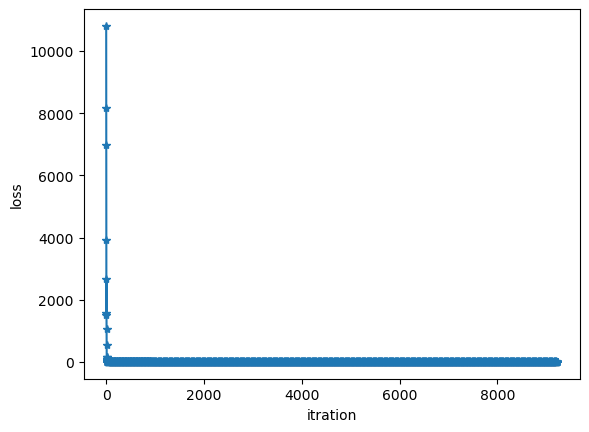

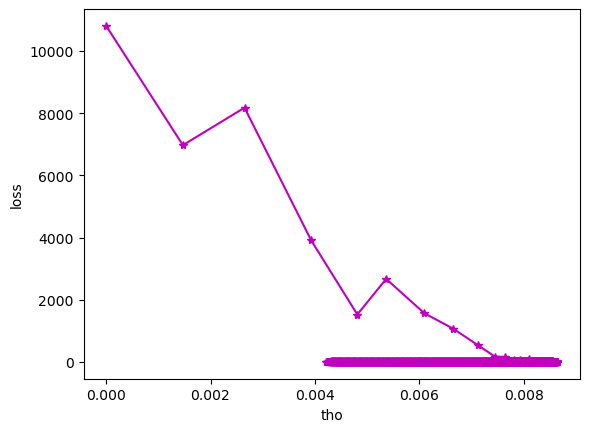

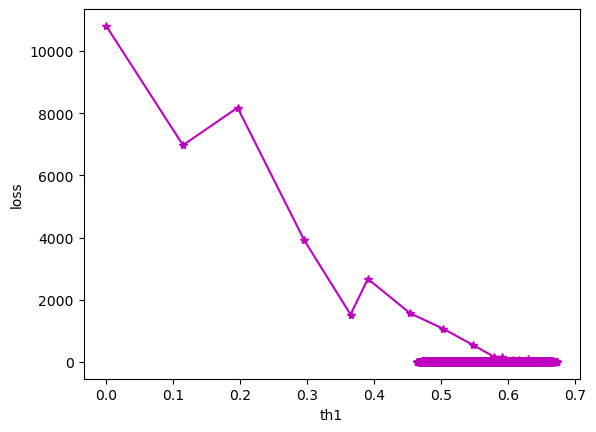

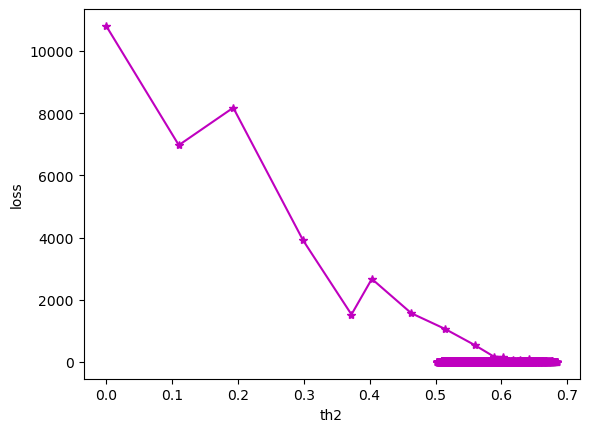

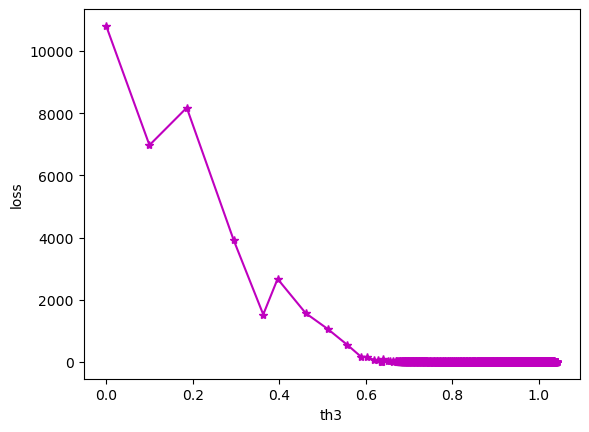

In [18]:
ths_arr=np.array(ths_arr)
plt.figure()

plt.plot(loss,"*-")
plt.xlabel("itration")
plt.ylabel("loss")

plt.show()


plt.figure()

plt.plot(ths_arr[:,0],loss,"m*-")
plt.xlabel("tho")
plt.ylabel("loss")

plt.show()
plt.figure()
plt.plot(ths_arr[:,1],loss,"m*-")
plt.xlabel("th1")
plt.ylabel("loss")
plt.show()
plt.figure()
plt.plot(ths_arr[:,2],loss,"m*-")
plt.xlabel("th2")
plt.ylabel("loss")
plt.show()
plt.figure()
plt.plot(ths_arr[:,3],loss,"m*-")
plt.xlabel("th3")
plt.ylabel("loss")
plt.show()

### Make your implementation as a function
#### Use your function to run the previous scenario and compare with Multivariable Batch GD.

In [57]:
def SGD_LR_MultiVaruble(x,y,alpha=.01,epoch=500,conver_check=.001,grad_check=.001):
    m=x.shape[0] 
    x_new=np.concatenate(( np.ones((m,1)),x ),axis=1   )
    n_1=x_new.shape[1]
    np.random.seed(101)
    D=np.concatenate(  (  x_new,y  ) ,axis=1)
    np.random.shuffle(D)
    x=D[:,n_1]
    y=D[:-1]
    ths=np.zeros(n_1)
    loss=[]
    ths_arr=[]
    for epoch in range(epochs): 
        print(f"****************** Epoch {epoch}********************")
        for i in range(m):
            ths_arr.append(ths)
            h=x_sh[i]@ths                # (4,) ,(4,)
            e=h-y_sh[i]                 #scalar
            j=e**2/2                    #scaler
            loss.append(j)
            grad=e*x_sh[i]             # vec of 4 elem  
            ths=ths-alpha*grad
        print(f"j ={j}")
        print(f"grad= \n {grad} \n ")
        print(f"ths= \n {ths} \n ")
        grad_norm=np.linalg.norm(grad)
        print(f"grad norm=  {grad_norm}  ")
        if(grad_norm<grad_check) :
          break
        if(epoch>0 and np.absolute(loss[-1]-loss[-(m+1)])<conver_check ):
           break 
    return loss ,ths_arr
    

### Batch GD

In [20]:

def GD_MultivarDatch(X,y,alpha=0.001,max_iter=1000,grad_check=0.001,conv_check=0.001):
    
    m = X.shape[0]
    X_new = np.concatenate((np.ones((m,1)),X),axis=1)
    print(X_new)
    n_1=X_new.shape[1]
    
    thetas = np.zeros((n_1,1))
    loss = []

    thetas_all = []

    for i in range(max_iter):
        print(f'****************** Iteration {i} ********************\n')
        thetas_all.append(thetas)

        h = X_new@thetas
        print(f'h(x):{h}\n')

        e = h-y

        j= np.linalg.norm(e)**2/(2*m)
        loss.append(j)
        print(f'Error Vector:\n{e}\n')
        print(f'j = {j}\n')

        grad = X_new.T @ e /m
        print(f'Gradient Vector:\n{grad}\n')
        grad_norm = np.linalg.norm(grad)
        print(f'Gradient Vector Norm:\n{grad_norm}\n')

        if grad_norm <grad_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'theta_Opt :\n {thetas}\n')
            print(f'Error Vector:\n{e}\n')
            print(f'Cost = {j}\n')
            print(f'h(x) = y_predict:\n{h}\n')
            print(f'y_actual:\n{y}\n')
            break
        elif i>0 and np.absolute(loss[i-1] - loss[i])<conv_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'theta_Opt :\n {thetas}\n')
            print(f'Error Vector:\n{e}\n')
            print(f'Cost = {j}\n')
            print(f'h(x) = y_predict:\n{h}\n')
            print(f'y_actual:\n{y}\n')
            break

        thetas =  thetas - alpha * grad
        print(f'New Thetas : {thetas}\n')
    
    return loss, thetas_all

In [30]:
data=np.genfromtxt("MultiVarLR.csv",delimiter=',')
x=data[:,:3]
y=data[:,3].reshape(-1,1)
L,T = GD_MultivarDatch(x,y,0.00001,10000,0.1,0.001)

[[  1.  73.  80.  75.]
 [  1.  93.  88.  93.]
 [  1.  89.  91.  90.]
 [  1.  96.  98. 100.]
 [  1.  73.  66.  70.]
 [  1.  53.  46.  55.]
 [  1.  69.  74.  77.]
 [  1.  47.  56.  60.]
 [  1.  87.  79.  90.]
 [  1.  79.  70.  88.]
 [  1.  69.  70.  73.]
 [  1.  70.  65.  74.]
 [  1.  93.  95.  91.]
 [  1.  79.  80.  73.]
 [  1.  70.  73.  78.]
 [  1.  93.  89.  96.]
 [  1.  78.  75.  68.]
 [  1.  81.  90.  93.]
 [  1.  88.  92.  86.]
 [  1.  78.  83.  77.]
 [  1.  82.  86.  90.]
 [  1.  86.  82.  89.]
 [  1.  78.  83.  85.]
 [  1.  76.  83.  71.]
 [  1.  96.  93.  95.]]
****************** Iteration 0 ********************

h(x):[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector:
[[-152.]
 [-185.]
 [-180.]
 [-196.]
 [-142.]
 [-101.]
 [-149.]
 [-115.]
 [-175.]
 [-164.]
 [-141.]
 [-141.]
 [-184.]
 [-152.]
 [-148.]
 [-192.]
 [-147.]
 [-183.]
 [-177.]
 [-159.]
 [-177.]
 [-175.]
 [

In [31]:

y_pred=x_sh@T[-1].reshape(-1,1)
print(r2_score(y_sh,y_pred))


0.9797103568402049


In [32]:
def plot_loss(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    
def plot_loss_iter(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()
    
def plot_theta_loss(Th,Th_0_1,Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

def calc_best_fit(Ths,Xin):
    y_best_fit= Xin @ Ths
    return y_best_fit

def plotReg(X,y,y_pred):
    plt.figure(figsize =(10,8))
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot(X,y_pred,'r*-')
    plt.show()

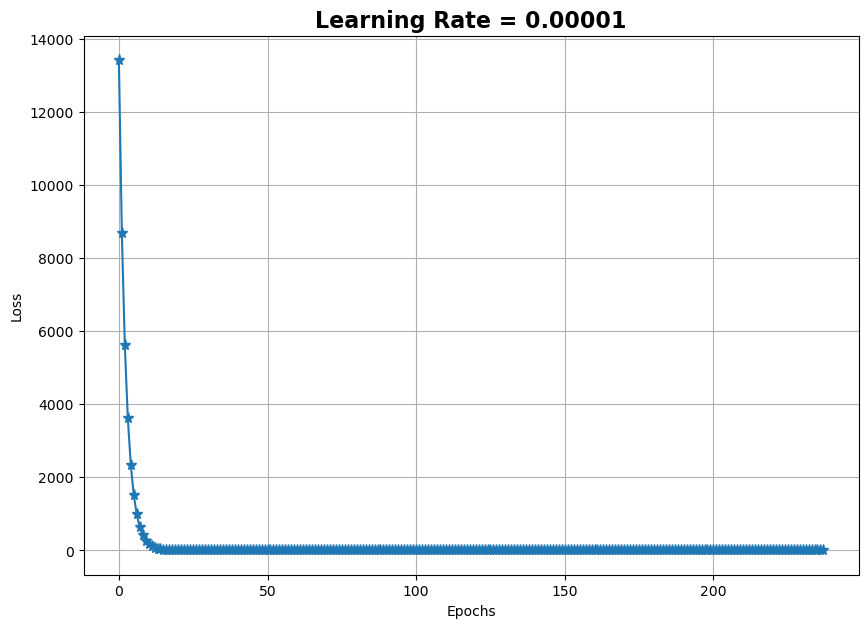

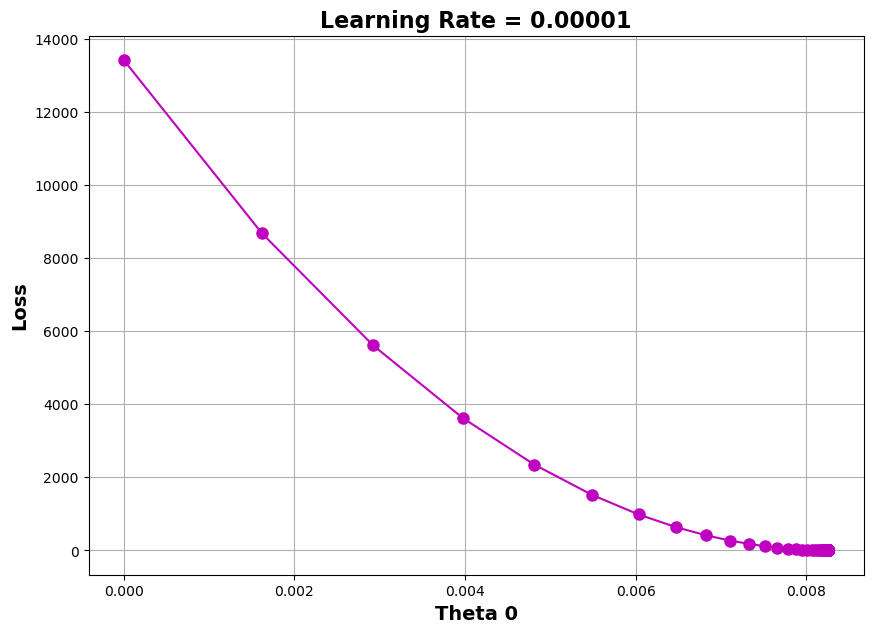

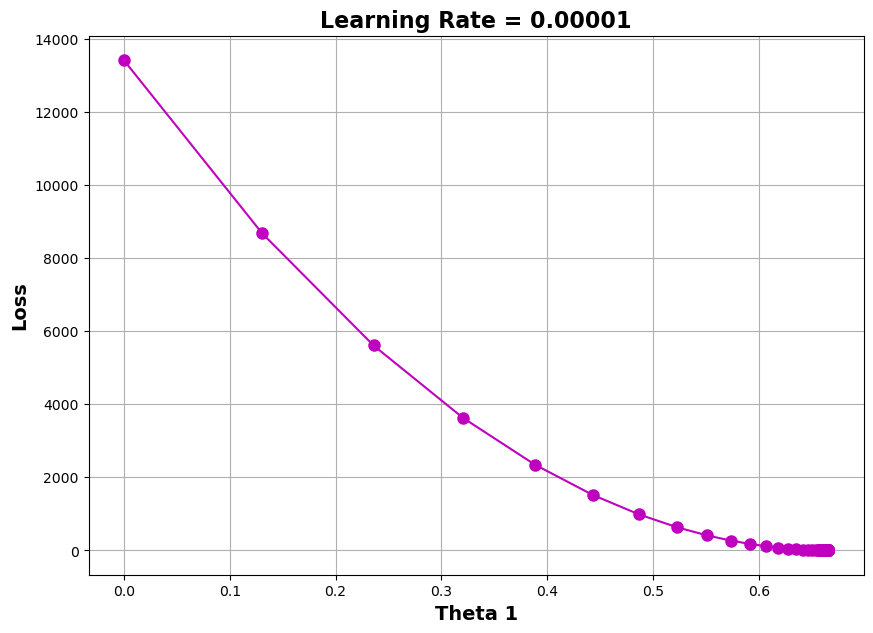

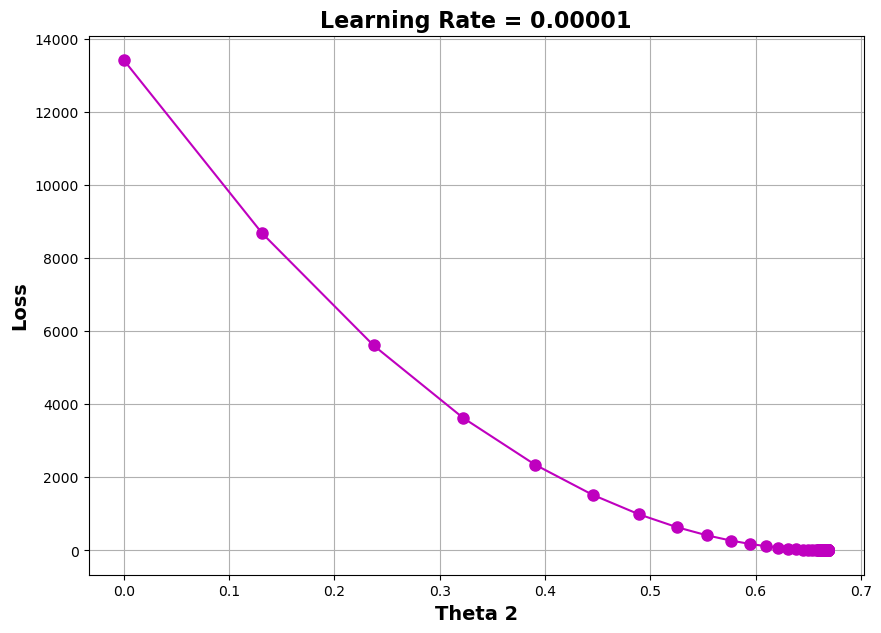

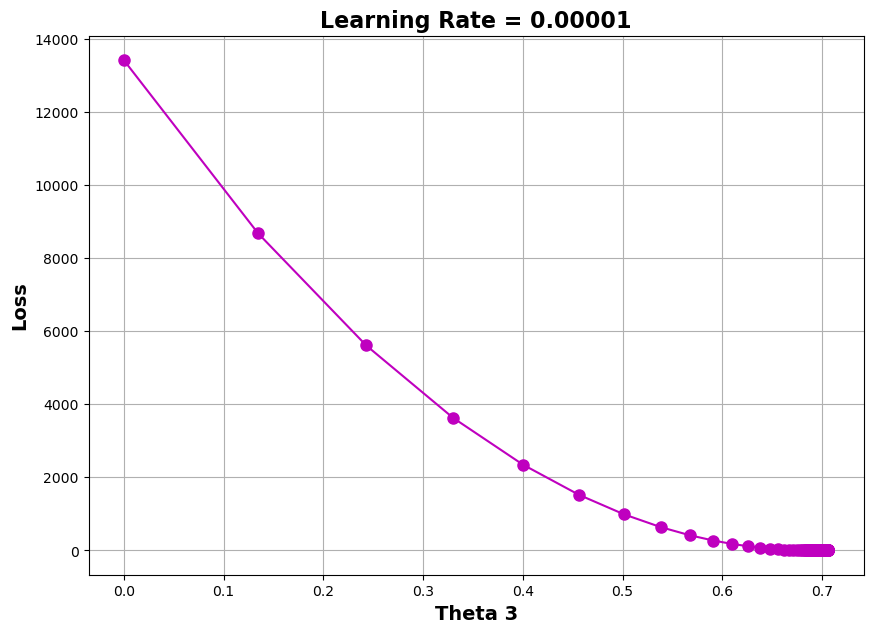

In [33]:

plot_loss(L,'Learning Rate = 0.00001')
ths_arr = np.array(T).reshape((len(T),4))
plot_theta_loss(ths_arr[:,0:1],'Theta 0',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',L,'Learning Rate = 0.00001')

### SGD

In [59]:
data=np.genfromtxt("MultiVarLR.csv",delimiter=',')
x=data[:,:3]
y=data[:,3].reshape(-1,1)
L,T = SGD_LR_MultiVaruble(x,y,0.00001,10000,0.001,0.1) 

****************** Epoch 0********************
j =0.24204037135034231
grad= 
 [ 0.69575911 48.70313788 45.22434232 51.48617433] 
 
ths= 
 [0.00857675 0.66913418 0.68031496 0.68278003] 
 
grad norm=  84.07465138146812  
****************** Epoch 1********************
j =0.9472218676718938
grad= 
 [  1.37638793  96.34715514  89.46521549 101.85270686] 
 
ths= 
 [0.00860999 0.67089367 0.68175146 0.68770805] 
 
grad norm=  166.32097709997373  
****************** Epoch 2********************
j =0.961873755509241
grad= 
 [  1.38699225  97.08945774  90.15449647 102.63742675] 
 
ths= 
 [0.00860847 0.66994876 0.68044237 0.68987416] 
 
grad norm=  167.60239006616783  
****************** Epoch 3********************
j =0.9727691998644739
grad= 
 [  1.39482558  97.63779063  90.66366273 103.21709295] 
 
ths= 
 [0.00860672 0.66899625 0.67913097 0.69201751] 
 
grad norm=  168.5489593941241  
****************** Epoch 4********************
j =0.9836371180617012
grad= 
 [  1.40259554  98.18168748  91.168709

****************** Epoch 0 ********************

j = 0.24204037135034231

Gradient Vector:
[ 0.69575911 48.70313788 45.22434232 51.48617433]

Gradient Vector Norm:
84.07465138146812

New Thetas : 0.6827800314537147

****************** Epoch 1 ********************

j = 0.9472218676718938

Gradient Vector:
[  1.37638793  96.34715514  89.46521549 101.85270686]

Gradient Vector Norm:
166.32097709997373

New Thetas : 0.6877080515350135

****************** Epoch 2 ********************

j = 0.961873755509241

Gradient Vector:
[  1.38699225  97.08945774  90.15449647 102.63742675]

Gradient Vector Norm:
167.60239006616783

New Thetas : 0.6898741592735241

****************** Epoch 3 ********************

j = 0.9727691998645135

Gradient Vector:
[  1.39482558  97.63779063  90.66366273 103.21709295]

Gradient Vector Norm:
168.54895939412754

New Thetas : 0.6920175132882319

****************** Epoch 4 ********************

j = 0.9836371180617012

Gradient Vector:
[  1.40259554  98.18168748  91.1687


Gradient Vector:
[  2.35774625 165.04223755 153.2535063  174.47322256]

Gradient Vector Norm:
284.90707559858043

New Thetas : 1.0093896439389727

****************** Epoch 297 ********************

j = 2.7814765982581995

Gradient Vector:
[  2.35859136 165.1013951  153.3084383  174.53576053]

Gradient Vector Norm:
285.00919735252836

New Thetas : 1.0098472848747861

****************** Epoch 298 ********************

j = 2.7834520740213495

Gradient Vector:
[  2.35942878 165.16001431 153.36287043 174.59772941]

Gradient Vector Norm:
285.1103897961621

New Thetas : 1.0103026043950092

****************** Epoch 299 ********************

j = 2.7854102254117703

Gradient Vector:
[  2.36025856 165.21809891 153.41680614 174.65913314]

Gradient Vector Norm:
285.2106593781609

New Thetas : 1.0107556148557886

****************** Epoch 300 ********************

j = 2.7873511586239816

Gradient Vector:
[  2.36108075 165.27565264 153.47024888 174.71997564]

Gradient Vector Norm:
285.3100125064922



In [61]:
y_pred=x_sh@T[-1].reshape(-1,1)
print(r2_score(y_sh,y_pred))


0.9873565654534185


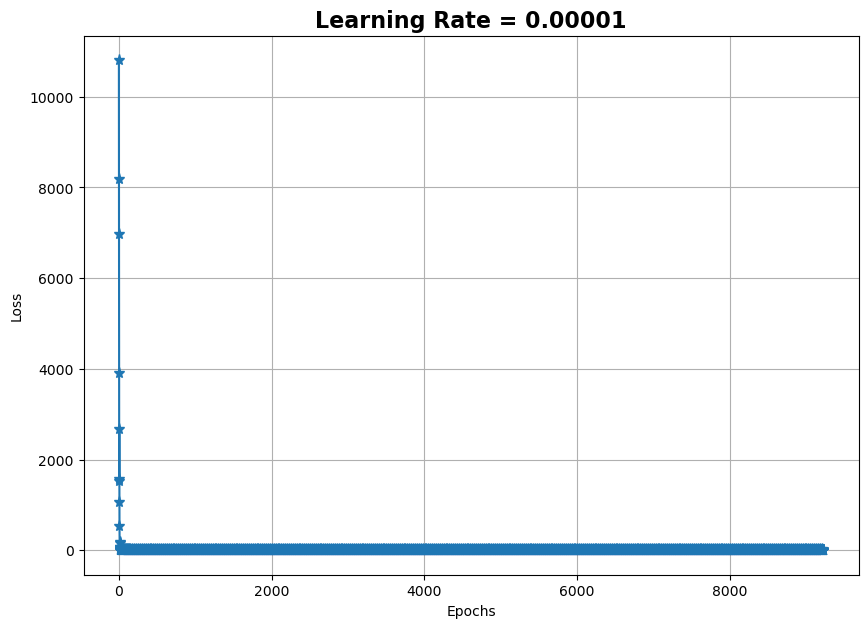

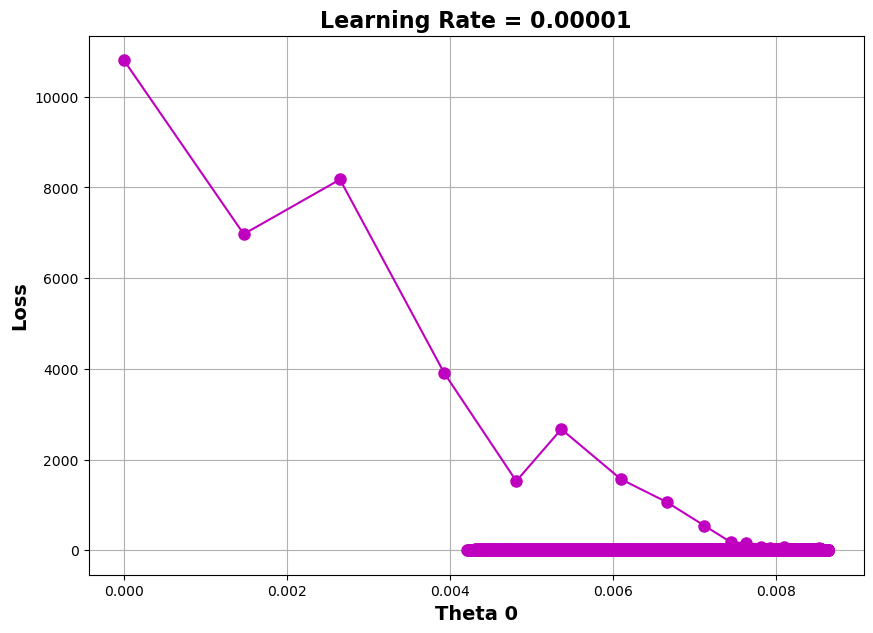

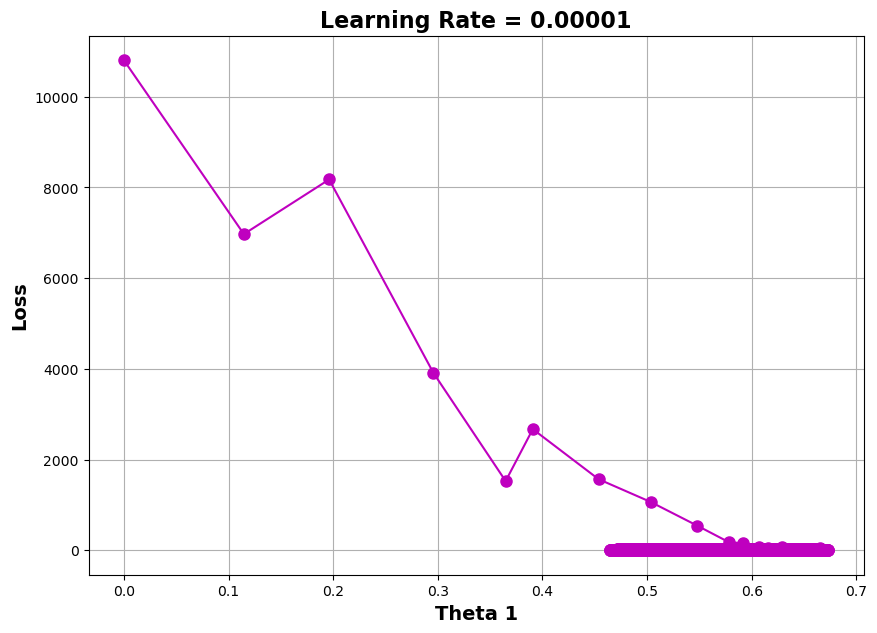

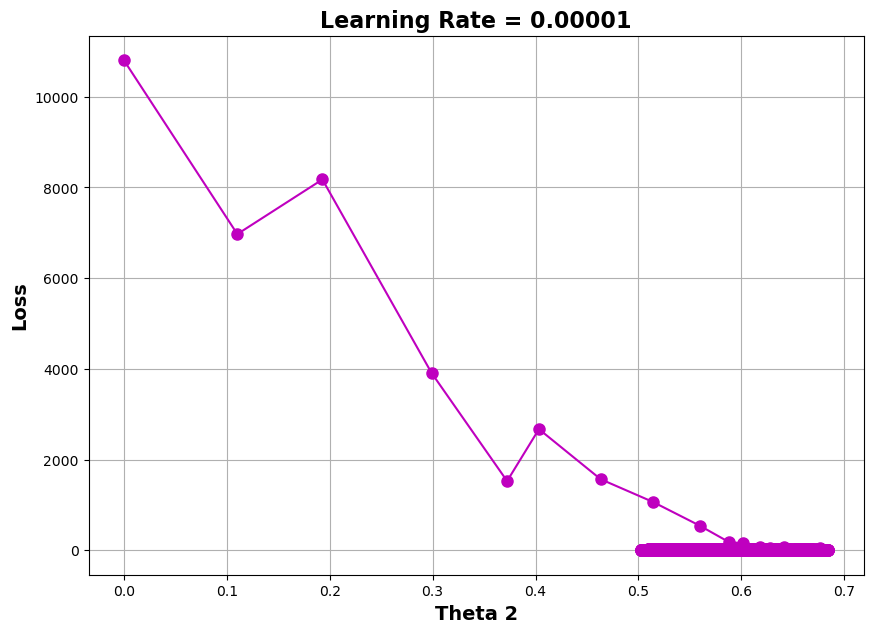

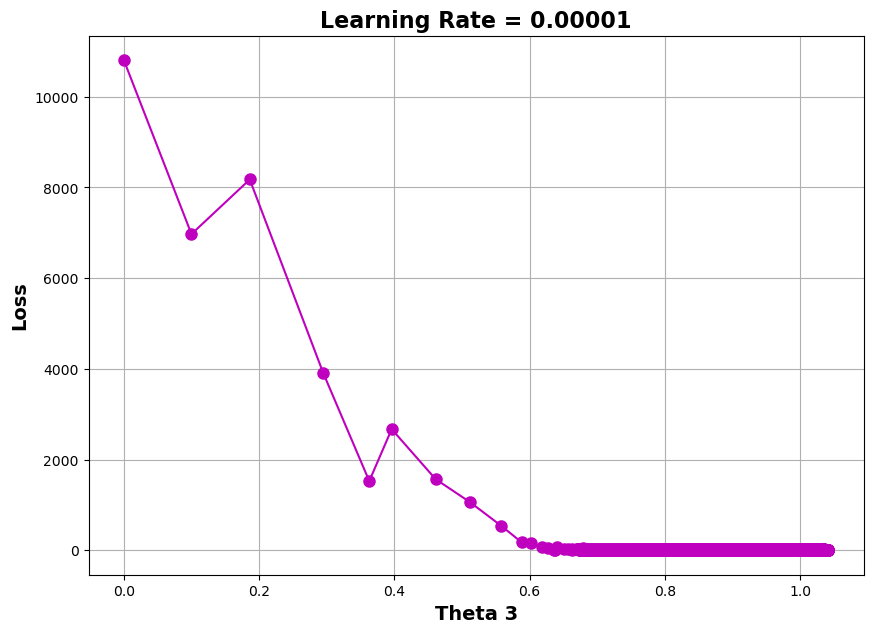

In [62]:

plot_loss(L,'Learning Rate = 0.00001')
ths_arr = np.array(T).reshape((len(T),4))
plot_theta_loss(ths_arr[:,0:1],'Theta 0',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',L,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',L,'Learning Rate = 0.00001')

r squared: 0.9873565654534185


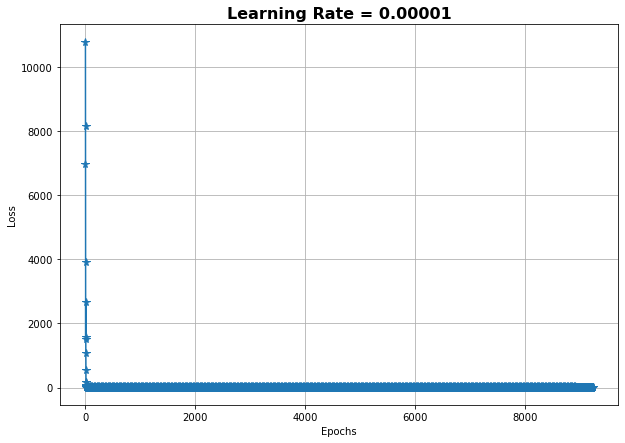

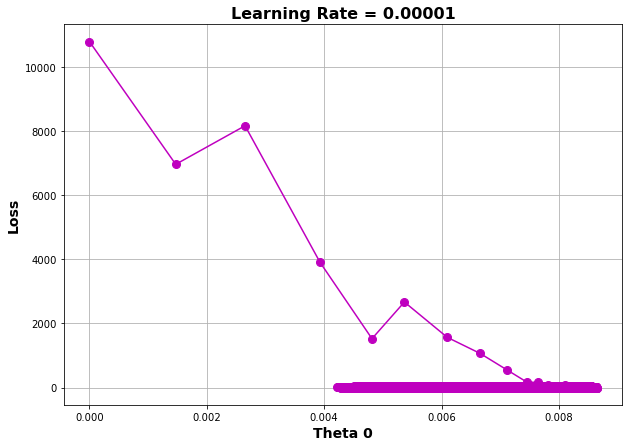

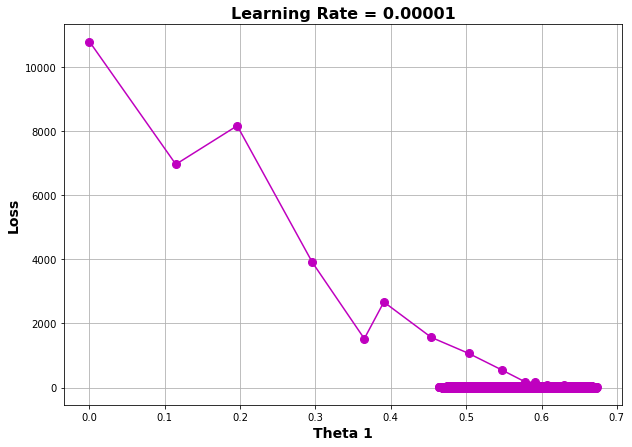

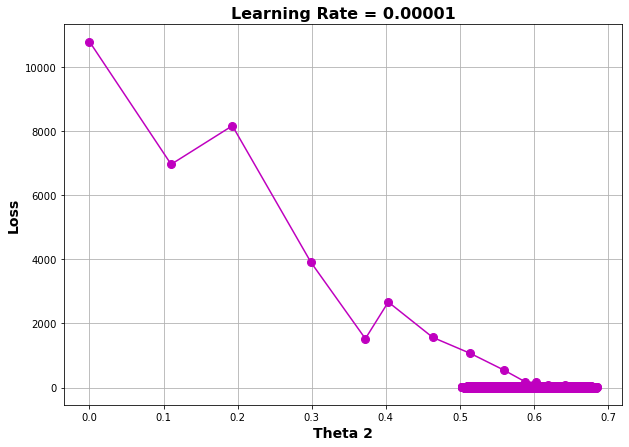

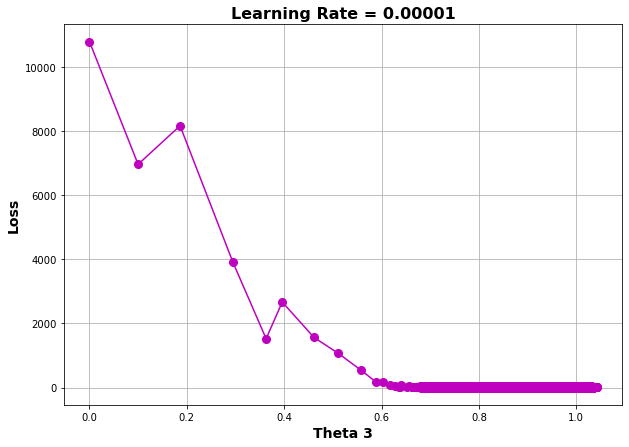